In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [2]:
df = pd.read_csv('Life Expectancy Data.csv')

In [3]:
print(df.shape)
df.head()

(2938, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
country_df = df.groupby('Country',as_index=False).mean()

In [5]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
df.Population.mean()

12753375.120052498

In [7]:
df.Population.median()

1386542.0

In [8]:
df.columns = df.columns.str.replace(' ', '')

In [9]:
df.columns

Index(['Country', 'Year', 'Status', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB',
       'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling'],
      dtype='object')

In [10]:
list(country_df[country_df.Population.isna()==True].Country)

['Antigua and Barbuda',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Bolivia (Plurinational State of)',
 'Brunei Darussalam',
 'Congo',
 'Cook Islands',
 'Cuba',
 'Czechia',
 "Côte d'Ivoire",
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Dominica',
 'Egypt',
 'Gambia',
 'Grenada',
 'Iran (Islamic Republic of)',
 'Kuwait',
 'Kyrgyzstan',
 "Lao People's Democratic Republic",
 'Libya',
 'Marshall Islands',
 'Micronesia (Federated States of)',
 'Monaco',
 'Nauru',
 'New Zealand',
 'Niue',
 'Oman',
 'Qatar',
 'Republic of Korea',
 'Republic of Moldova',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'San Marino',
 'Saudi Arabia',
 'Singapore',
 'Slovakia',
 'Somalia',
 'The former Yugoslav republic of Macedonia',
 'United Arab Emirates',
 'United Kingdom of Great Britain and Northern Ireland',
 'United Republic of Tanzania',
 'United States of America',
 'Venezuela (Bolivarian Republic of)',
 'Viet Nam',
 'Yemen']

In [11]:
country_pop_dict = {'Antigua and Barbuda':96286,'Bahamas':393244,'Bahrain':1701575,'Barbados':287375,
                    'Bolivia (Plurinational State of)':11673021,'Brunei Darussalam':437479,'Congo':89561403,'Cook Islands':17564,
                   'Cuba':11326616,'Czechia':10708981,"Côte d'Ivoire":26286219,"Democratic People's Republic of Korea":25778816,
                    'Democratic Republic of the Congo':89561403,'Dominica':71986,'Egypt':102334404,'Gambia':2416668,'Grenada':112523,
                    'Iran (Islamic Republic of)':83992949,'Kuwait':4270571,'Kyrgyzstan':6524195,"Lao People's Democratic Republic":7275560,
                    'Libya':6871292,'Marshall Islands':59190,"Micronesia (Federated States of)":548914,"Monaco":39203,'Nauru':10824,
                    'New Zealand':4822233,'Niue':1626,"Oman":5106626,'Qatar':2881053,'Republic of Korea':51269185,
                    'Republic of Moldova':4033963,'Saint Kitts and Nevis':53199,'Saint Lucia':183627,'Saint Vincent and the Grenadines':110940,
                    'San Marino':33921,'Saudi Arabia':34813871,'Singapore':5850342,'Slovakia':5459642,'Somalia':15830339,
                    'The former Yugoslav republic of Macedonia':2083374,'United Arab Emirates':9890000,
                    "United Kingdom of Great Britain and Northern Ireland":67886011,'United Republic of Tanzania':59734218, 'Eritrea':3546421,
                    'United States of America':331002651,"Venezuela (Bolivarian Republic of)":28435940,'Viet Nam':97338579,'Yemen':29825964
                   }

In [12]:
df2 = df[df.Country.isin(list(country_pop_dict.keys()))]

In [13]:
df2['Population']=df.Country

In [14]:
df2.Population=df2.Population.map(lambda x: country_pop_dict[x])

In [15]:
df2.Population=df2.Population.astype(float)

In [16]:
df=df[df.Country.isin(country_pop_dict.keys())!=True]

In [17]:
ab=pd.concat([df,df2])

In [18]:
ab.Population.isna().sum()

0

In [19]:
df=ab

In [20]:
df.sort_values(by='Country',inplace=True)

In [21]:
df.head()

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
15,Afghanistan,2000,Developing,54.8,321.0,88,0.01,10.424960,62.0,6532,...,24.0,8.20,24.0,0.1,114.560000,293756.0,2.3,2.5,0.338,5.5
14,Afghanistan,2001,Developing,55.3,316.0,88,0.01,10.574728,63.0,8762,...,35.0,7.80,33.0,0.1,117.496980,2966463.0,2.1,2.4,0.340,5.9
13,Afghanistan,2002,Developing,56.2,3.0,88,0.01,16.887351,64.0,2486,...,36.0,7.76,36.0,0.1,187.845950,21979923.0,19.9,2.2,0.341,6.2
12,Afghanistan,2003,Developing,56.7,295.0,87,0.01,11.089053,65.0,798,...,41.0,8.82,41.0,0.1,198.728544,2364851.0,19.7,19.9,0.373,6.5


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2923
Data columns (total 22 columns):
Country                         2938 non-null object
Year                            2938 non-null int64
Status                          2938 non-null object
Lifeexpectancy                  2928 non-null float64
AdultMortality                  2928 non-null float64
infantdeaths                    2938 non-null int64
Alcohol                         2744 non-null float64
percentageexpenditure           2938 non-null float64
HepatitisB                      2385 non-null float64
Measles                         2938 non-null int64
BMI                             2904 non-null float64
under-fivedeaths                2938 non-null int64
Polio                           2919 non-null float64
Totalexpenditure                2712 non-null float64
Diphtheria                      2919 non-null float64
HIV/AIDS                        2938 non-null float64
GDP                             2490 no

In [23]:
df.isna().sum()

Country                           0
Year                              0
Status                            0
Lifeexpectancy                   10
AdultMortality                   10
infantdeaths                      0
Alcohol                         194
percentageexpenditure             0
HepatitisB                      553
Measles                           0
BMI                              34
under-fivedeaths                  0
Polio                            19
Totalexpenditure                226
Diphtheria                       19
HIV/AIDS                          0
GDP                             448
Population                        0
thinness1-19years                34
thinness5-9years                 34
Incomecompositionofresources    167
Schooling                       163
dtype: int64

In [24]:
for col in df.columns:
    if df[col].isna().sum()>0:
        print(col)

Lifeexpectancy
AdultMortality
Alcohol
HepatitisB
BMI
Polio
Totalexpenditure
Diphtheria
GDP
thinness1-19years
thinness5-9years
Incomecompositionofresources
Schooling


In [25]:
df['Lifeexpectancy'].mean(),df['Lifeexpectancy'].median()

(69.22493169398912, 72.1)

In [26]:
df['Lifeexpectancy'].fillna(71,inplace=True)

In [27]:
df['AdultMortality'].mean(),df['AdultMortality'].median()

(164.79644808743168, 144.0)

In [28]:
df['AdultMortality'].fillna(154,inplace=True)

In [29]:
df['Alcohol'].mean(),df['Alcohol'].median()

(4.602860787172037, 3.755)

In [30]:
df['Alcohol'].fillna(4.2,inplace=True)

In [31]:
df['HepatitisB'].mean(),df['HepatitisB'].median()

(80.94046121593291, 92.0)

In [32]:
df['HepatitisB'].fillna(86,inplace=True)

In [33]:
df['BMI'].mean(),df['BMI'].median()

(38.321246556473724, 43.5)

In [34]:
df['BMI'].fillna(41,inplace=True)

In [35]:
df['Polio'].mean(),df['Polio'].median()

(82.55018842069202, 93.0)

In [36]:
df['Polio'].fillna(88,inplace=True)

In [37]:
df['Totalexpenditure'].mean(),df['Totalexpenditure'].median()

(5.938189528023591, 5.755)

In [38]:
df['Totalexpenditure'].fillna(5.8,inplace=True)

In [39]:
df['Diphtheria'].mean(),df['Diphtheria'].median()

(82.32408359027065, 93.0)

In [40]:
df['Diphtheria'].fillna(88,inplace=True)

In [41]:
df['GDP'].mean(),df['GDP'].median()

(7483.158469138481, 1766.947595)

In [42]:
df['GDP'].fillna(1766/2+7484/2,inplace=True)

In [43]:
df['thinness1-19years'].median(),df['thinness1-19years'].mean()

(3.3, 4.839703856749322)

In [44]:
df['thinness1-19years'].fillna(4,inplace=True)

In [45]:
df['thinness5-9years'].median(),df['thinness5-9years'].mean()

(3.3, 4.870316804407711)

In [46]:
df['thinness5-9years'].fillna(4,inplace=True)

In [47]:
df['Incomecompositionofresources'].median(),df['Incomecompositionofresources'].mean()

(0.677, 0.6275510645976164)

In [48]:
df['Incomecompositionofresources'].fillna(0.65,inplace=True)

In [49]:
df['Schooling'].median(),df['Schooling'].mean()

(12.3, 11.992792792792786)

In [50]:
df['Schooling'].fillna(12,inplace=True)

In [51]:
df.shape

(2938, 22)

In [52]:
len(df.Country.unique())

193

In [53]:
df.isna().sum().sum()

0

In [54]:
country_df = df.groupby('Country',as_index=False).mean()

In [55]:
country_df

,Country,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2007.5,58.19375,269.0625,78.2500,0.014375,34.960110,64.5625,2362.2500,15.51875,...,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250
1,Albania,2007.5,75.15625,45.0625,0.6875,4.848750,193.259091,98.0000,53.3750,49.06875,...,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
2,Algeria,2007.5,73.61875,108.1875,20.3125,0.643750,236.185241,80.0000,1943.8750,48.74375,...,91.7500,4.678750,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
3,Angola,2007.5,49.01875,328.5625,83.7500,5.644375,102.100268,77.1250,3561.3125,18.01875,...,46.1250,4.036875,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
4,Antigua and Barbuda,2007.5,75.05625,127.5000,0.0000,7.715000,1001.585226,97.5000,0.0000,38.42500,...,96.9375,4.854375,98.3125,0.12500,9759.305728,9.628600e+04,3.42500,3.37500,0.488625,8.84375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela (Bolivarian Republic of),2007.5,73.38750,163.0000,9.3750,7.218750,0.000000,66.2500,165.0000,54.48750,...,74.6875,5.048750,68.5000,0.10000,4625.000000,2.843594e+07,1.65000,1.56250,0.726812,12.78750
189,Viet Nam,2007.5,74.77500,126.5625,29.1875,3.156875,0.000000,87.2500,4232.9375,11.18750,...,94.9375,5.966250,91.7500,0.14375,4625.000000,9.733858e+07,14.92500,15.62500,0.627062,11.51250
190,Yemen,2007.5,63.86250,211.8125,39.3750,0.306875,0.000000,55.6875,2761.1875,33.48750,...,67.1250,5.055000,72.6250,0.10000,4625.000000,2.982596e+07,13.83125,13.75000,0.475500,8.50625
191,Zambia,2007.5,53.90625,354.3125,33.4375,2.361875,89.650407,74.8750,6563.8125,17.45000,...,64.3750,5.822500,74.2500,11.93125,811.811841,6.260246e+06,6.88125,6.76250,0.498438,11.21250


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2923
Data columns (total 22 columns):
Country                         2938 non-null object
Year                            2938 non-null int64
Status                          2938 non-null object
Lifeexpectancy                  2938 non-null float64
AdultMortality                  2938 non-null float64
infantdeaths                    2938 non-null int64
Alcohol                         2938 non-null float64
percentageexpenditure           2938 non-null float64
HepatitisB                      2938 non-null float64
Measles                         2938 non-null int64
BMI                             2938 non-null float64
under-fivedeaths                2938 non-null int64
Polio                           2938 non-null float64
Totalexpenditure                2938 non-null float64
Diphtheria                      2938 non-null float64
HIV/AIDS                        2938 non-null float64
GDP                             2938 no

In [57]:
df.Status.unique()

array(['Developing', 'Developed'], dtype=object)

In [58]:
status_dict={'Developing':0,'Developed':1}
df.Status=df.Status.map(lambda x: status_dict[x])

In [59]:
df.Status.unique()

array([0, 1])

In [60]:
df.set_index('Country',inplace=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2938 entries, Afghanistan to Zimbabwe
Data columns (total 21 columns):
Year                            2938 non-null int64
Status                          2938 non-null int64
Lifeexpectancy                  2938 non-null float64
AdultMortality                  2938 non-null float64
infantdeaths                    2938 non-null int64
Alcohol                         2938 non-null float64
percentageexpenditure           2938 non-null float64
HepatitisB                      2938 non-null float64
Measles                         2938 non-null int64
BMI                             2938 non-null float64
under-fivedeaths                2938 non-null int64
Polio                           2938 non-null float64
Totalexpenditure                2938 non-null float64
Diphtheria                      2938 non-null float64
HIV/AIDS                        2938 non-null float64
GDP                             2938 non-null float64
Population                    

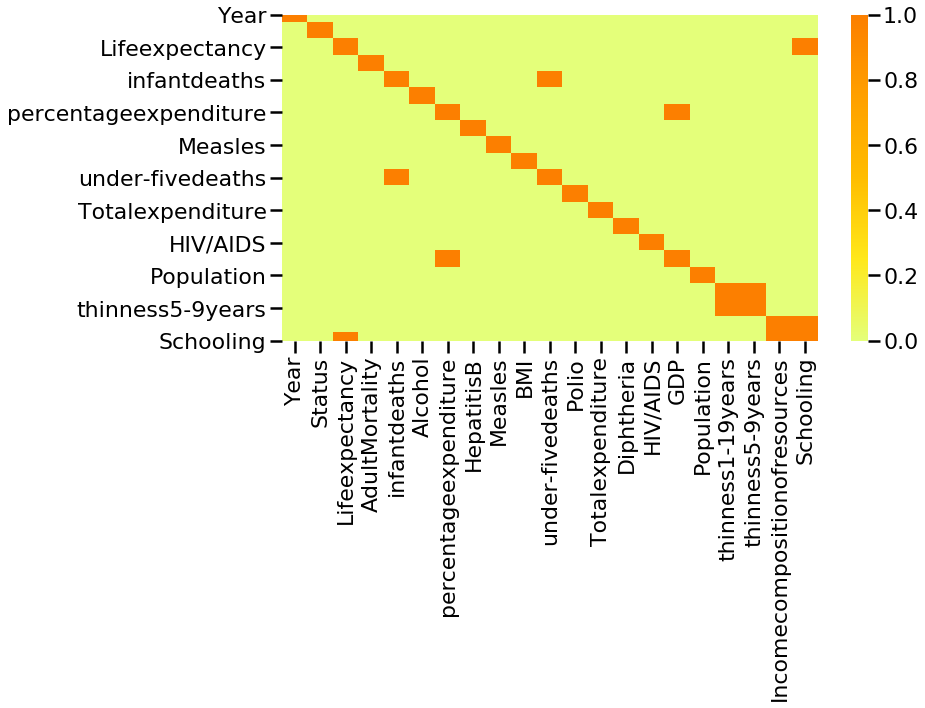

In [62]:
with sns.plotting_context('poster'):
    plt.figure(figsize=(12,6))
    sns.heatmap(df.corr()>=0.7,cmap='Wistia')
    plt.show()

In [63]:
df.drop(['under-fivedeaths','Schooling'],axis=1,inplace=True)

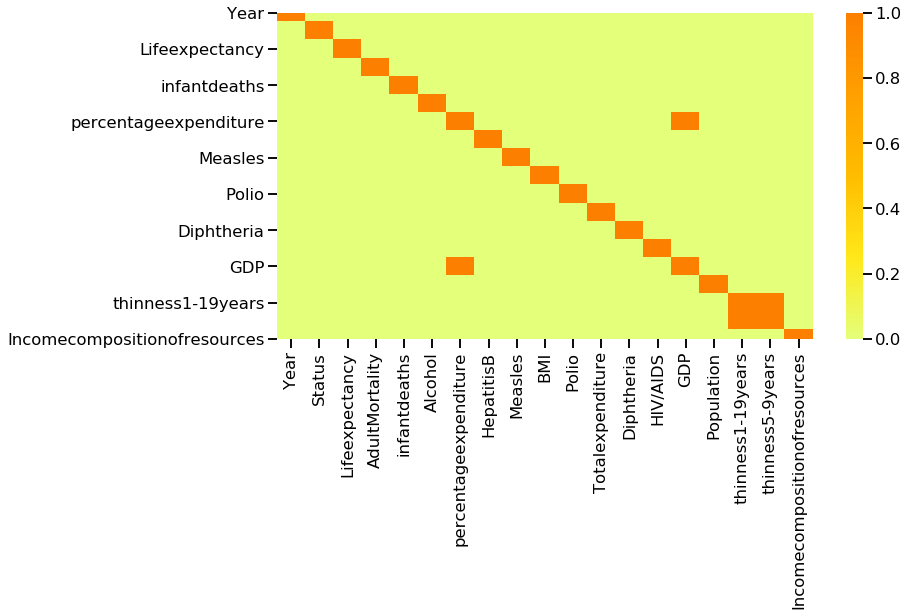

In [64]:
with sns.plotting_context('talk'):
    plt.figure(figsize=(12,6))
    sns.heatmap(df.corr()>=0.7,cmap='Wistia')
    plt.show()

In [65]:
df.drop(['percentageexpenditure','thinness5-9years'],axis=1,inplace=True)

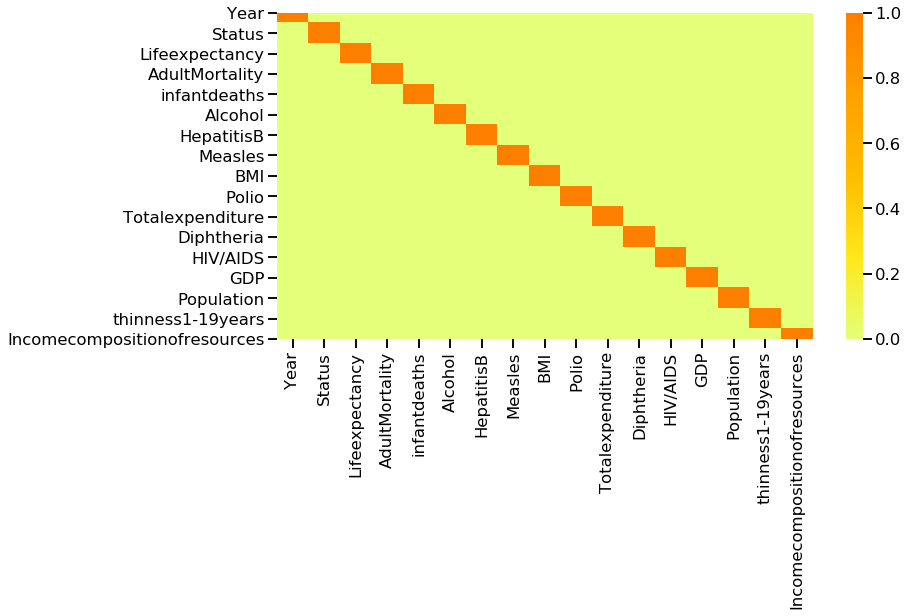

In [66]:
with sns.plotting_context('talk'):
    plt.figure(figsize=(12,6))
    sns.heatmap(df.corr()>=0.7,cmap='Wistia')
    plt.show()

In [67]:
print(df.shape)
df.head()

(2938, 17)


,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,Incomecompositionofresources
Country,,,,,,,,,,,,,,,,,
Afghanistan,2015,0,65.0,263.0,62,0.01,65.0,1154,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,0.479
Afghanistan,2000,0,54.8,321.0,88,0.01,62.0,6532,12.2,24.0,8.20,24.0,0.1,114.560000,293756.0,2.3,0.338
Afghanistan,2001,0,55.3,316.0,88,0.01,63.0,8762,12.6,35.0,7.80,33.0,0.1,117.496980,2966463.0,2.1,0.340
Afghanistan,2002,0,56.2,3.0,88,0.01,64.0,2486,13.0,36.0,7.76,36.0,0.1,187.845950,21979923.0,19.9,0.341
Afghanistan,2003,0,56.7,295.0,87,0.01,65.0,798,13.4,41.0,8.82,41.0,0.1,198.728544,2364851.0,19.7,0.373


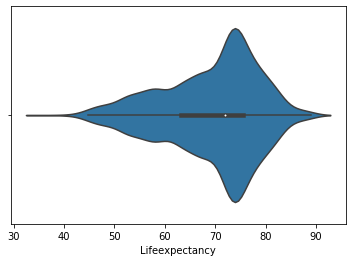

In [68]:
sns.violinplot(df['Lifeexpectancy'])

In [69]:
df = df[(np.abs(stats.zscore(df)) <= 2.5).all(axis=1)]

In [70]:
df.shape

(2082, 17)

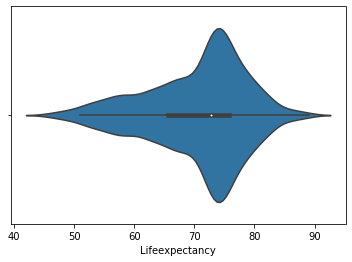

In [71]:
sns.violinplot(df['Lifeexpectancy'])

In [72]:
for i in [2,3,4,5]:
    print(i,(pd.cut(df.Lifeexpectancy,bins=i)).unique())

2 [(45.557, 67.3], (67.3, 89.0]]
Categories (2, interval[float64]): [(45.557, 67.3] < (67.3, 89.0]]
3 [(45.557, 60.067], (60.067, 74.533], (74.533, 89.0]]
Categories (3, interval[float64]): [(45.557, 60.067] < (60.067, 74.533] < (74.533, 89.0]]
4 [(45.557, 56.45], (67.3, 78.15], (78.15, 89.0], (56.45, 67.3]]
Categories (4, interval[float64]): [(45.557, 56.45] < (56.45, 67.3] < (67.3, 78.15] < (78.15, 89.0]]
5 [(54.28, 62.96], (71.64, 80.32], (62.96, 71.64], (45.557, 54.28], (80.32, 89.0]]
Categories (5, interval[float64]): [(45.557, 54.28] < (54.28, 62.96] < (62.96, 71.64] < (71.64, 80.32] < (80.32, 89.0]]


In [73]:
for i in [2,3,4,5]:
    print(i,(pd.qcut(df.Lifeexpectancy,q=i)).unique())

2 [(45.599000000000004, 72.8], (72.8, 89.0]]
Categories (2, interval[float64]): [(45.599000000000004, 72.8] < (72.8, 89.0]]
3 [(45.599000000000004, 68.3], (68.3, 74.7], (74.7, 89.0]]
Categories (3, interval[float64]): [(45.599000000000004, 68.3] < (68.3, 74.7] < (74.7, 89.0]]
4 [(45.599000000000004, 65.6], (72.8, 75.8], (65.6, 72.8], (75.8, 89.0]]
Categories (4, interval[float64]): [(45.599000000000004, 65.6] < (65.6, 72.8] < (72.8, 75.8] < (75.8, 89.0]]
5 [(45.599000000000004, 63.12], (73.9, 76.9], (71.0, 73.9], (76.9, 89.0], (63.12, 71.0]]
Categories (5, interval[float64]): [(45.599000000000004, 63.12] < (63.12, 71.0] < (71.0, 73.9] < (73.9, 76.9] < (76.9, 89.0]]


In [74]:
df['Target']=df["Lifeexpectancy"]
df.drop("Lifeexpectancy",axis=1,inplace=True)

In [75]:
X=df.drop(["Target"],axis=1)
y=df.Target

In [76]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=14,test_size=0.3)

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
gnb = GaussianNB()
lr = LogisticRegression()
lsv = LinearSVC()
svc = SVC()
sgd = SGDClassifier()
xgb = XGBClassifier()
knn = KNeighborsClassifier()
models = [rf,dt,gnb,lr,lsv,svc,sgd,xgb,knn]

In [78]:
mm = MinMaxScaler()
ma = MaxAbsScaler()
ss = StandardScaler()
rs = RobustScaler()
pt = PowerTransformer()
qt = QuantileTransformer()
mod_acc_list = []
for i in [mm,ma,ss,rs,pt,qt]:
    scaled_X = i.fit_transform(X.values)
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=14,test_size = 0.25)
    k = {}
    m = LinearRegression()
    m.fit(X_train,y_train)
    pred = m.predict(X_test)
    k[f'{i}'[0:3]] = r2_score(y_test,pred)
    mod_acc_list.append([f'{i}',k])

In [79]:
mod_acc_list

[['MinMaxScaler(copy=True, feature_range=(0, 1))',
  {'Min': 0.8539388859740198}],
 ['MaxAbsScaler(copy=True)', {'Max': 0.8539388859740198}],
 ['StandardScaler(copy=True, with_mean=True, with_std=True)',
  {'Sta': 0.8539388859740198}],
 ['RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,\n             with_scaling=True)',
  {'Rob': 0.8539388859740198}],
 ["PowerTransformer(copy=True, method='yeo-johnson', standardize=True)",
  {'Pow': 0.8539388859740198}],
 ["QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,\n                    output_distribution='uniform', random_state=None,\n                    subsample=100000)",
  {'Qua': 0.8539388859740198}]]

In [80]:
scaler = MinMaxScaler()
for col in X.columns:
    df[col] = scaler.fit_transform(df[[col]])

In [81]:
## this code is designed to find the number of features needed in the X data for an optimal accuracy score

def optimize_score_rfe(dataframe,method,style,target_variable,ts,cross_val=5,goal='accuracy'):
    
    """
    Input a goal, method, style (the method of analysis written as a string), and number of cross validations and 
    receive an optimal score, number of features used, and list of features used as an output
    """
    
    # Imports and initializing variables
    mms = MinMaxScaler()
    old_score = 0
    old_features_used = 1

    # Optimize features needed
    for i in range(1,df.shape[1]):
        y = dataframe.Target
        X = dataframe.drop('Target',axis=1)
        selector = RFE(method,n_features_to_select=i)
        # selector = RFECV(estimator=method, step=1, cv=StratifiedKFold(cross_val), scoring=goal,min_features_to_select=i)
        selector = selector.fit(X, y.values.ravel())
        selected_columns = X.columns[selector.support_]
        new_y = dataframe.Target
        new_X = dataframe[selected_columns]
        for col in new_X.columns:
            new_X[col] = mms.fit_transform(new_X[[col]])
        X_train, X_test, y_train, y_test = train_test_split(new_X,new_y,test_size=ts,random_state=14) 
        method.fit(X_train,y_train)
        Y_pred = method.predict(X_test)
        if style == 'Linear_Regression':
            accuracy = r2_score(y_test, Y_pred)
        else:
            accuracy = accuracy_score(y_test, Y_pred)
        new_score = accuracy
        if new_score > old_score:
            score = new_score
            features_used = i
            old_score = new_score
            old_features_used = i
        else:
            score = old_score
            features_used = old_features_used
    
        # crate new data frame based on work
        # selector_new = RFECV(estimator=method, step=1, cv=StratifiedKFold(cross_val), scoring='accuracy',min_features_to_select=features_used)
        selector_new = RFE(method,n_features_to_select=features_used)
        selector_new = selector_new.fit(X, y.values.ravel())
        selected_columns_new = X.columns[selector_new.support_]
        
    # print discoveries
    print(f'Predicting: {target_variable}')
    print('-'*40)
    print(f'The optimal score is {100*round(score,2)}%, and it makes use of {features_used} features from the data.')
    print('-'*40)
    print(f'Those features are: {list(selected_columns_new)}')

In [82]:
optimize_score_rfe(df,LinearRegression(),'Linear_Regression','life_expectancy',0.25)

Predicting: life_expectancy
----------------------------------------
The optimal score is 85.0%, and it makes use of 13 features from the data.
----------------------------------------
Those features are: ['Year', 'Status', 'AdultMortality', 'infantdeaths', 'HepatitisB', 'Measles', 'Polio', 'Totalexpenditure', 'Diphtheria', 'HIV/AIDS', 'Population', 'thinness1-19years', 'Incomecompositionofresources']


In [83]:
df=df[['Year', 'Status', 'AdultMortality', 'infantdeaths', 'HepatitisB', 'Measles', 'Polio', 'Totalexpenditure', 'Diphtheria', 'HIV/AIDS', 'Population', 'thinness1-19years', 'Incomecompositionofresources','Target']]

In [84]:
X=df.drop(["Target"],axis=1)
y=df.Target

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=14,test_size=0.25)

In [90]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred_tr=lr.predict(X_train)
pred_te=lr.predict(X_test)
print(f'train:{r2_score(pred_tr,y_train)}, test:{r2_score(pred_te,y_test)}')

train:0.8212732526151957, test:0.8204705470274058


In [93]:
conclusion = pd.DataFrame(lr.coef_).T

In [95]:
conclusion.columns = X.columns

In [96]:
conclusion

,Year,Status,AdultMortality,infantdeaths,HepatitisB,Measles,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,Population,thinness1-19years,Incomecompositionofresources
0,0.571257,1.001888,-8.05606,-6.61862,-2.129333,-0.337478,2.591712,2.376696,4.239294,-11.587504,3.292173,-1.73911,17.998304
